<a href="https://colab.research.google.com/github/meryam12/Optimisation/blob/main/TP_Optimisation_kechbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Les algorithmes d' Adam ou Adaptive Moment Optimization combinent les méthodes heuristiques de Momentum et de RMSProp**
![Texte alternatif…](https://blog.paperspace.com/content/images/2018/06/adam.png)

# **Exercice 01 : Implémenation de l'algorithme ADAM**

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Générer aléatoirement une matrice de taille (m*n)
def gener_mat(m, n, sigma):
  m = np.random.normal(size=(m, n), scale=sigma)
  return m

In [ ]:
#Initialiser les paramétres de ADAM avec les valeurs données dans l'article
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.999						
epsilon = 10e-8


In [ ]:
max_iteration = 300
def Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration):
  m = 0 #Initialize 1st moment vector
  v = 0 #Initialize 2nd moment vector
  t = 0 #Initialize timestep
  
  teta = np.zeros(A.shape[1])

  liste = np.arange(len(A))
  np.random.shuffle(liste)
    
  for i in range(max_iteration):
    #Si la taille du batch spécifié est supérieur au nombre de
    #lignes, on utilise le nombre de ligne max à la place
    
    if len(liste) > batch_size:
      index = liste[:batch_size]
      liste = liste[batch_size:]
    else :
      liste = np.arange(len(A))
      np.random.shuffle(liste)
      index = liste[:batch_size]
      liste = liste[batch_size:]
      
    A_batch = []
    b_batch = []
    
    for i in index:
      A_batch.append(A[i])
      b_batch.append(b[i])
    #On calcule le gradient
    gt = np.array(A_batch).T @ ((np.array(A_batch) @ teta) - b_batch)
    t+=1
    m_t = (beta_1 * m) + (1. - beta_1) * gt 
    v_t = (beta_2 * v) + ((1. - beta_2) * (np.square(gt)))
    m_t = m_t / ( 1 - (np.power(beta_1, t)))
    v_t = v_t / ( 1 - (np.power(beta_2, t)))
    teta_t = teta - alpha * m_t / (np.sqrt(v_t) + epsilon)
    
    ## Sortir si la convergence est détectée
    if epsilon > np.linalg.norm(teta_t - teta)/np.linalg.norm(teta_t):
      m = m_t
      v = v_t
      teta = teta_t
      break
    teta = teta_t
  return teta



In [ ]:
# (m, n, max_iterations, batch_size)
tests = [
    (100, 100, 500, 30),
    (500, 500, 1000, 70),
    (1000, 100, 2000, 100)
]

for test in tests:
  m, n, max_iterations, batch_size = test
  A = gener_mat(m, n, 1.)
  x = np.zeros(n)
  x[0:10] = 2
  b = A @ x
  teta =Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
  loss = np.linalg.norm(b - np.dot(A, teta.T))
  print(loss / A.shape[0])

0.03658831350705733
0.026075360540926174
0.004025794987400433


**On remarque que plus la tqille des données augmente plus le loss diminue, Adam calcule le pas de déscente à chaque itération.**

# **Exercice 2 : régularisation de Tikhonov**

Le même algorithme précédent asuf que on va ajouter au gradient précédent le gradient de la régularisation.

 On calcule le gradient de Tikhonov tel que

$$
\begin{aligned}
    \mathcal{R}_{Tikhonov}(x) &= \frac{1}{2}||x||^2 \\
    \nabla \mathcal{R}_{Tikhonov}(x) &= \frac{1}{2} . 2x \\
    \nabla \mathcal{R}_{Tikhonov}(x) &= x \\
\end{aligned}
$$

In [ ]:
max_iteration = 300
def Adam_thikonov(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda):
 
  m = 0 #Initialize 1st moment vector
  v = 0 #Initialize 2nd moment vector
  t = 0 #Initialize timestep
  
  teta = np.zeros(A.shape[1])

  liste = np.arange(len(A))
  np.random.shuffle(liste)
    
  for i in range(max_iteration):
    #Si la taille du batch spécifié est supérieur au nombre de
    #lignes, on utilise le nombre de ligne max à la place
    
    if len(liste) > batch_size:
      index = liste[:batch_size]
      liste = liste[batch_size:]
    else :
      liste = np.arange(len(A))
      np.random.shuffle(liste)
      index = liste[:batch_size]
      liste = liste[batch_size:]
      
    A_batch = []
    b_batch = []
    
    for i in index:
      A_batch.append(A[i])
      b_batch.append(b[i])
    #On calcule le gradient
    gt = np.array(A_batch).T @ ((np.array(A_batch) @ teta) - b_batch)+Lambda*teta
    t+=1
    m_t = (beta_1 * m) + (1. - beta_1) * gt 
    v_t = (beta_2 * v) + ((1. - beta_2) * (np.square(gt)))
    m_t = m_t / ( 1 - (np.power(beta_1, t)))
    v_t = v_t / ( 1 - (np.power(beta_2, t)))
    teta_t = teta - alpha * m_t / (np.sqrt(v_t) + epsilon)
    
    ## Sortir si la convergence est détectée
    if epsilon > np.linalg.norm(teta_t - teta)/np.linalg.norm(teta_t):
      m = m_t
      v = v_t
      teta = teta_t
      break
    teta = teta_t
  return teta



In [ ]:
def plot_losses(losses, ylabel, xlabel, legends, title):
  plt.figure(figsize=(16, 9))
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  for l in losses:
    plt.plot(range(len(l)), l)
  plt.legend(legends)
  plt.title(title)
  plt.show()

In [ ]:
def test_tikhonov(epochs):
  m = 10000
  n = 1000
  max_iteration = 100
  batch_size = 200
  A = gener_mat(m, n, 1.)
  x = np.zeros(n)
  x[0:10] = 2
  b = A @ x

  tikho_losses = list()
  theta =Adam_thikonov(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda=0.5)
  tikho_losses.append(np.linalg.norm(b - np.dot(A, theta.T))) 
  for epoch in range(1, epochs):
    new_theta = Adam_thikonov(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda=0.5)
    theta = theta / (1. + 1. / epoch) + new_theta / (epoch + 1)
    loss = np.linalg.norm(b - np.dot(A, theta.T))
    tikho_losses.append(loss)
        
  normal_losses = list()
  theta = Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
  normal_losses.append(np.linalg.norm(b - np.dot(A, theta.T)))
  for i in range(1, epochs):
    new_theta = Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
    theta = theta / (1. + 1. / epoch) + new_theta / (epoch + 1)
    loss = np.linalg.norm(b - np.dot(A, theta.T))
    normal_losses.append(loss)
        
  plot_losses([tikho_losses, normal_losses], 'Losses', 'Iterations', ['avec Tikhonov' , 'sans regularisation'],
        'Comparaison des coûts de Adam avec et sans la régularisation Tikhonov ')
  
  print('Final normal loss :', normal_losses[epochs-1] / A.shape[0])
  print('Final Tikhonov loss :', tikho_losses[epochs-1] / A.shape[0])
    


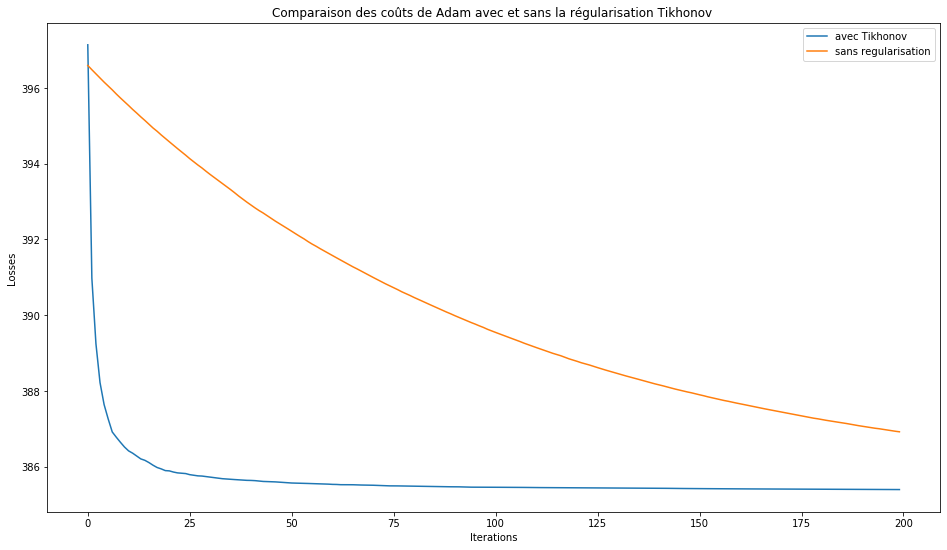

Final normal loss : 0.03869229869584239
Final Tikhonov loss : 0.03853984217058498


In [ ]:
test_tikhonov(200)


**On constate que la version régularisée est meilleure que la version normale.
La régularisation permet de converger plus rapidement mais on obtient des solutions plus lisses**


# **Exercice 3 : régularisation parcimonieuse**

**On doit calculer d'abord le gradient de la régularisation puis l'ajouter au gradient qui se trouve dans l'algorithme ADAM**

$$
\begin{aligned}
    \mathcal{R}_{Huber}(x) &=
    \left \{
        \begin{aligned}
            & \frac{1}{2} \sum^d_{i=1} |x_i|^2 \textrm{ si } ||x|| < \delta \textrm{,} \\
            & \delta \sum^d_{i=1} |x_i| - \frac{1}{2} \delta^2 \textrm{ sinon,}
        \end{aligned}
    \right . \\
    \nabla \mathcal{R}_{Huber}(x) &=
    \left \{
        \begin{aligned}
            & \nabla \frac{1}{2} \sum^d_{i=1} |x_i|^2 = \nabla ||x||^2 = \nabla \frac{1}{2} . 2x = x \textrm{ si } ||x|| < \delta \textrm{,} \\
            & \nabla \delta \sum^d_{i=1} |x_i| - \frac{1}{2} \delta^2 = ||x||_1 \textrm{ et } \nabla ||x||_1 = sign(x) \textrm{ donc } \delta-sign(x) \textrm{ sinon,}
        \end{aligned}
    \right . \\
\end{aligned}
$$

**Une des caractéristique de la régression parcimonieuse est qu'elle tend à éliminer complétement les poids des variables les moins importantes en leur donnant la valeur zéro.**

In [ ]:
max_iteration = 300
def Adam_parcimonieuse(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda, delta):
 
  m = 0 #Initialize 1st moment vector
  v = 0 #Initialize 2nd moment vector
  t = 0 #Initialize timestep
  
  teta = np.zeros(A.shape[1])

  liste = np.arange(len(A))
  np.random.shuffle(liste)
    
  for i in range(max_iteration):
    #Si la taille du batch spécifié est supérieur au nombre de
    #lignes, on utilise le nombre de ligne max à la place
    
    if len(liste) > batch_size:
      index = liste[:batch_size]
      liste = liste[batch_size:]
    else :
      liste = np.arange(len(A))
      np.random.shuffle(liste)
      index = liste[:batch_size]
      liste = liste[batch_size:]
      
    A_batch = []
    b_batch = []
    
    for i in index:
      A_batch.append(A[i])
      b_batch.append(b[i])
    #On calcule le gradient
    
    if sum(teta) < delta:
      R_Hubert_derive = -delta
    elif abs(sum(teta)) <=  delta:
      R_Hubert_derive = teta
    else : R_Hubert_derive = delta
    gt = np.array(A_batch).T @ ((np.array(A_batch) @ teta) - b_batch)+ Lambda*R_Hubert_derive
    t+=1
    m_t = (beta_1 * m) + (1. - beta_1) * gt 
    v_t = (beta_2 * v) + ((1. - beta_2) * (np.square(gt)))
    m_t = m_t / ( 1 - (np.power(beta_1, t)))
    v_t = v_t / ( 1 - (np.power(beta_2, t)))
    teta_t = teta - alpha * m_t / (np.sqrt(v_t) + epsilon)
    
    ## Sortir si la convergence est détectée
    if epsilon > np.linalg.norm(teta_t - teta)/np.linalg.norm(teta_t):
      m = m_t
      v = v_t
      teta = teta_t
      break
    teta = teta_t
  return teta



In [ ]:
def test_parcimonieuse(epochs):
  m = 10000
  n = 1000
  max_iteration = 100
  batch_size = 200
  A = gener_mat(m, n, 1.)
  x = np.zeros(n)
  x[0:10] = 2
  b = A @ x

  parci_losses = list()
  theta =Adam_parcimonieuse(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda =0.5, delta=5)
  parci_losses.append(np.linalg.norm(b - np.dot(A, theta.T))) 
  for epoch in range(1, epochs):
    new_theta = Adam_parcimonieuse(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda =0.5, delta=5)
    theta = theta / (1. + 1. / epoch) + new_theta / (epoch + 1)
    loss = np.linalg.norm(b - np.dot(A, theta.T))
    parci_losses.append(loss)
        
  normal_losses = list()
  theta = Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
  normal_losses.append(np.linalg.norm(b - np.dot(A, theta.T)))
  for i in range(1, epochs):
    new_theta = Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
    theta = theta / (1. + 1. / epoch) + new_theta / (epoch + 1)
    loss = np.linalg.norm(b - np.dot(A, theta.T))
    normal_losses.append(loss)
        
  plot_losses([parci_losses, normal_losses], 'Losses', 'Iterations', ['avec régularisation parcimonieuse' , 'sans regularisation'],
        'Comparaison des coûts de Adam avec et sans la régularisation parcimonieuse ')
  
  print('Final normal loss :', normal_losses[epochs-1] / A.shape[0])
  print('Final parcimonieuse loss :', parci_losses[epochs-1] / A.shape[0])

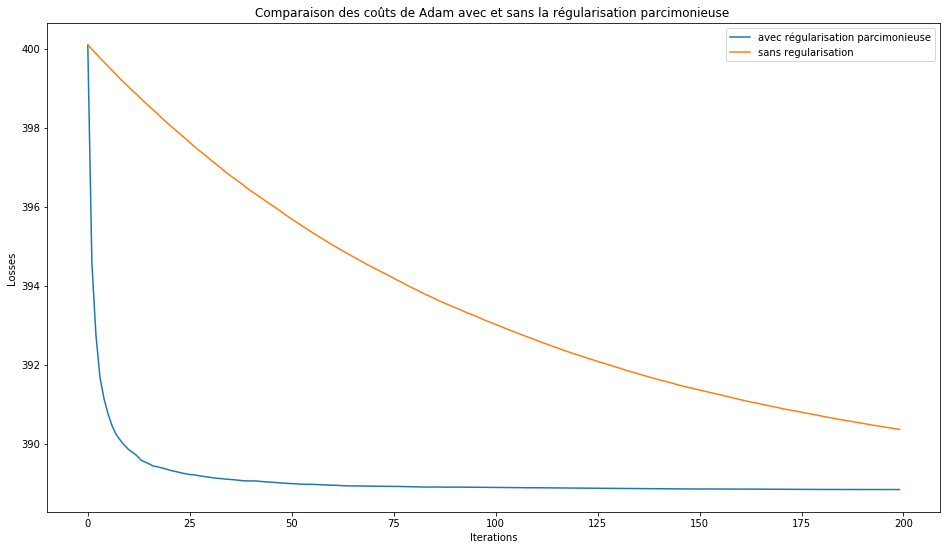

Final normal loss : 0.039036194678638905
Final parcimonieuse loss : 0.03888382344427741


In [ ]:
test_parcimonieuse(200)

La régularisation parcimonieuse converge plus vite

# **Exercice 6 : Régularisation elastic_net** 

la régularisation ElasticNet est un compromis entre la regression lasso et ridge. 
On souhaite implémenter la régularisation elastic-net suivante :

$$
\mathcal{R}_{elastic-net}(x) = \frac{1}{2} ||x||^2 + \gamma ||x||_1
$$

On doit calculer le gradient $\nabla \mathcal{R}_{elastic-net}(x)$.

On déjà trouvé

$$
\nabla \frac{1}{2} ||x||^2 = x
$$

$$
\nabla ||x||_1 = sign(x)
$$

Donc

$$
\nabla \mathcal{R}_{elastic-net}(x) = x + \gamma sign(x)
$$

In [ ]:
def ADAM_elastic_net(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda, delta,  gamma):
  m = 0 #Initialize 1st moment vector
  v = 0 #Initialize 2nd moment vector
  t = 0 #Initialize timestep
  
  teta = np.zeros(A.shape[1])

  liste = np.arange(len(A))
  np.random.shuffle(liste)
    
  for i in range(max_iteration):
    #Si la taille du batch spécifié est supérieur au nombre de
    #lignes, on utilise le nombre de ligne max à la place
    
    if len(liste) > batch_size:
      index = liste[:batch_size]
      liste = liste[batch_size:]
    else :
      liste = np.arange(len(A))
      np.random.shuffle(liste)
      index = liste[:batch_size]
      liste = liste[batch_size:]
      
    A_batch = []
    b_batch = []
    
    for i in index:
      A_batch.append(A[i])
      b_batch.append(b[i])
    #On calcule le gradient
    
    if sum(teta) < delta:
      R_Hubert_derive = -delta
    elif abs(sum(teta)) <=  delta:
      R_Hubert_derive = teta
    else : R_Hubert_derive = delta
    gt = np.array(A_batch).T @ ((np.array(A_batch) @ teta) - b_batch) + Lambda*(teta + gamma*R_Hubert_derive)
    t+=1
    m_t = (beta_1 * m) + (1. - beta_1) * gt 
    v_t = (beta_2 * v) + ((1. - beta_2) * (np.square(gt)))
    m_t = m_t / ( 1 - (np.power(beta_1, t)))
    v_t = v_t / ( 1 - (np.power(beta_2, t)))
    teta_t = teta - alpha * m_t / (np.sqrt(v_t) + epsilon)
    
    ## Sortir si la convergence est détectée
    if epsilon > np.linalg.norm(teta_t - teta)/np.linalg.norm(teta_t):
      m = m_t
      v = v_t
      teta = teta_t
      break
    teta = teta_t
  return teta
    

In [ ]:
def test_elastic(epochs):
  m = 10000
  n = 1000
  max_iteration = 100
  batch_size = 200
  A = gener_mat(m, n, 1.)
  x = np.zeros(n)
  x[0:10] = 2
  b = A @ x

  elast_losses = list()
  theta =ADAM_elastic_net(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda =0.5, delta =5,  gamma=0.5)
  elast_losses.append(np.linalg.norm(b - np.dot(A, theta.T))) 
  for epoch in range(1, epochs):
    new_theta = ADAM_elastic_net(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration,Lambda =0.5, delta =5,  gamma=0.5)
    theta = theta / (1. + 1. / epoch) + new_theta / (epoch + 1)
    loss = np.linalg.norm(b - np.dot(A, theta.T))
    elast_losses.append(loss)
        
  normal_losses = list()
  theta = Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
  normal_losses.append(np.linalg.norm(b - np.dot(A, theta.T)))
  for i in range(1, epochs):
    new_theta = Adam(A,b,batch_size, alpha, beta_1, beta_2, epsilon, max_iteration)
    theta = theta / (1. + 1. / epoch) + new_theta / (epoch + 1)
    loss = np.linalg.norm(b - np.dot(A, theta.T))
    normal_losses.append(loss)
        
  plot_losses([elast_losses, normal_losses], 'Losses', 'Iterations', ['avec régularisation elastic_net' , 'sans regularisation'],
        'Comparaison des coûts de Adam avec et sans la régularisation elastic_net ')
  
  print('Final normal loss :', normal_losses[epochs-1] / A.shape[0])
  print('Final elastic_net loss :', elast_losses[epochs-1] / A.shape[0])

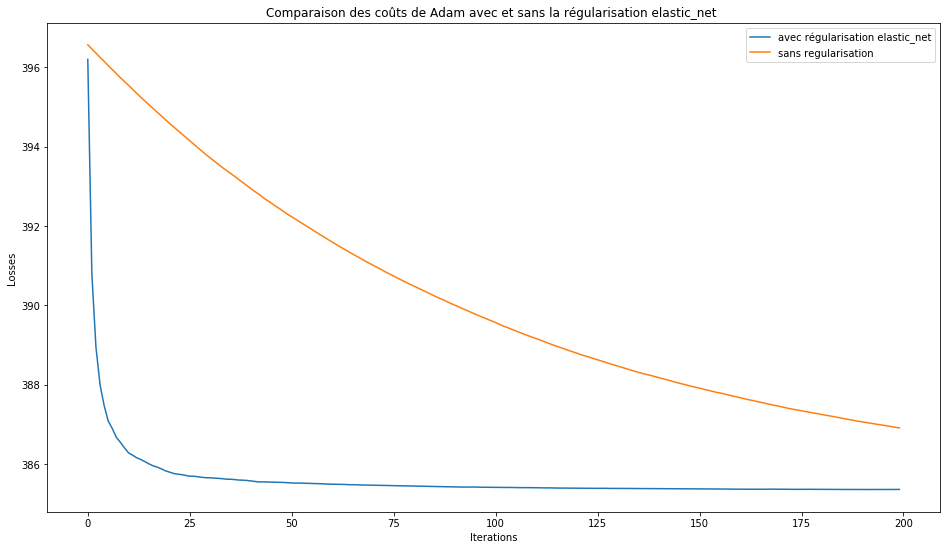

Final normal loss : 0.0386907699402932
Final elastic_net loss : 0.0385356898807733


In [ ]:
test_elastic(200)